# Batch run resultaten

In dit notebook analyseren we de resultaten van onze batch runs waarin drie verkeerslichtstrategieën worden vergeleken:

- **Auction-based traffic lights**
- **Fixed cycle traffic lights**
- **Dutch system**

We testen deze strategieën onder vier specifieke scenario’s die variëren in verkeersdrukte (normale tijd vs. spitsuur) en voertuigsnelheid (2 vs. 5). Deze scenario’s zijn als volgt gedefinieerd in de batchconfiguratie (zie afbeelding):

- Normale tijd, snelheid 2  
- Spitsuur, snelheid 2  
- Normale tijd, snelheid 5  
- Spitsuur, snelheid 5  

De focus ligt met name op de gemiddelde wachttijd en de doorstroming van voertuigen op het kruispunt.

Deze analyses helpen ons inzicht te krijgen in welke strategie het meest efficiënt is in het verminderen van wachttijden en het verbeteren van de algehele verkeersdoorstroom onder verschillende verkeersomstandigheden.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

sns.set(style="whitegrid")

## CSV-bestanden inladen en combineren

In [14]:
filenames = [
    "combined_batch_results_1_lane.csv",
    "combined_batch_results_2_lane.csv",
    "combined_batch_results_3_lane.csv",
    "combined_batch_results_5_lane.csv"
]

In [12]:
all_dfs = []
for file in filenames:
    df = pd.read_csv(file)
    lanes = int(file.split("_")[3])  # extract number of lanes
    df["num_lanes"] = lanes
    all_dfs.append(df)

df = pd.concat(all_dfs, ignore_index=True)

## Eerste verkenning van de data

In [26]:
print("Dataset overzicht:\n")
print(df.info())
print("\n Samenvatting:\n")
print(df.describe())
print("\nStrategieën getest:", df["light_strategy"].unique())
print("Verkeerscondities getest:", df["traffic_condition"].unique())
print("Aantal rijstroken getest:", df["num_lanes"].unique())

Dataset overzicht:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4804800 entries, 0 to 4804799
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   RunId                   int64  
 1   iteration               int64  
 2   Step                    int64  
 3   width                   int64  
 4   height                  int64  
 5   num_lanes               int64  
 6   light_strategy          object 
 7   traffic_condition       object 
 8   car_speed               int64  
 9   TrafficFlowPerInterval  int64  
 10  AverageWaitingTime      float64
 11  scenario                object 
dtypes: float64(1), int64(8), object(3)
memory usage: 439.9+ MB
None

 Samenvatting:

              RunId     iteration          Step      width     height  \
count  4.804800e+06  4.804800e+06  4.804800e+06  4804800.0  4804800.0   
mean   4.950000e+01  4.950000e+01  5.000000e+02       20.0       20.0   
std    2.886607e+01  2.886607e+01  2.889637e

In [16]:
df["scenario"] = df["traffic_condition"] + " | speed=" + df["car_speed"].astype(str)

### Gemiddelde wachttijd per verkeerslichtstrategie

In deze analyse onderzoeken we de gemiddelde wachttijd per verkeerslichtstrategie onder verschillende scenario’s. De scenario’s combineren twee verkeerscondities (Normale tijd en Spitsuur) met twee voertuigsnelheden (2 en 5). 

Voor elk scenario analyseren we de prestaties van drie strategieën:

- `auction` (veilinggebaseerd)
- `fixed_cycle` (vaste cycli)
- `dutch_system` (experimenteel systeem)

We bekijken deze strategieën onder vier infrastructuuropties: 1, 2, 3, en 5 rijstroken. Dit helpt ons beoordelen welke strategie het meest efficiënt is bij variërende verkeersdrukte en infrastructuurcapaciteit.

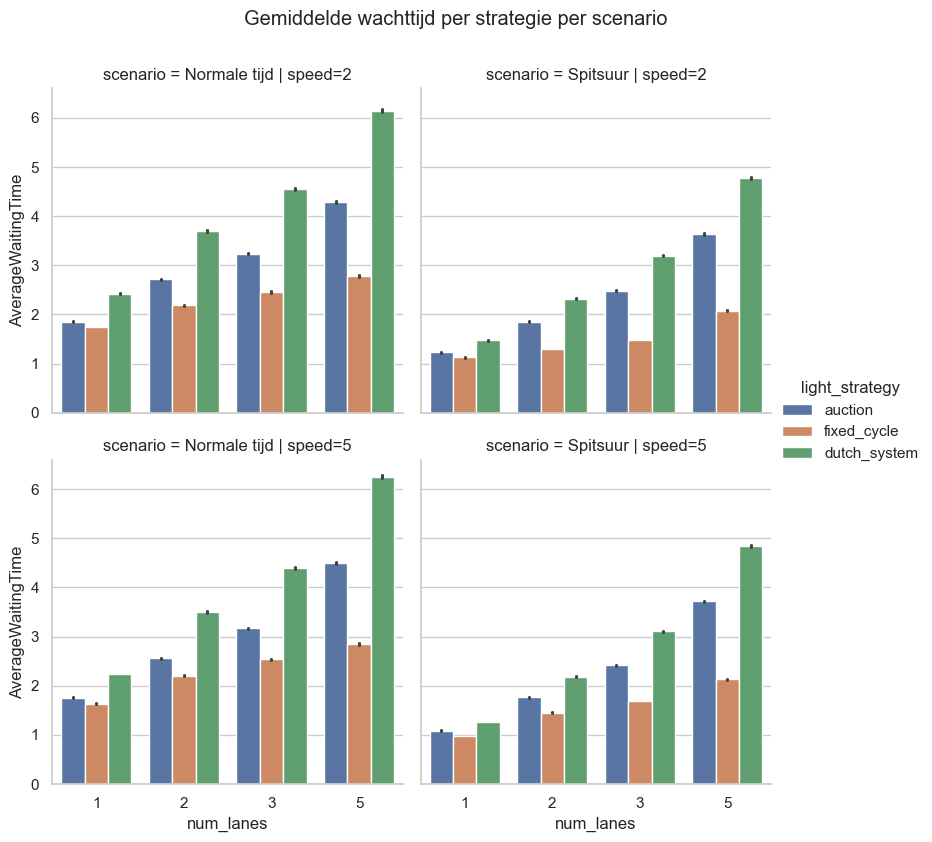

In [17]:
sns.set(style="whitegrid")
sns.catplot(data=df, x="num_lanes", y="AverageWaitingTime", hue="light_strategy",
            col="scenario", kind="bar", col_wrap=2, height=4)
plt.suptitle("Gemiddelde wachttijd per strategie per scenario", y=1.05)
plt.show()

Uit de resultaten blijkt dat:

- **`fixed_cycle`** gemiddeld de laagste wachttijden oplevert, vooral bij meer rijstroken en tijdens spitsuren.
- **`auction`** presteert redelijk stabiel, maar is zelden de beste keuze.
- **`dutch_system`** veroorzaakt de hoogste wachttijden in vrijwel alle gevallen, wat kan wijzen op beperkingen of optimalisatieproblemen in deze strategie.

De analyse suggereert dat `fixed_cycle` momenteel de meest efficiënte strategie is, vooral in omgevingen met hogere verkeersdrukte en meerdere rijstroken.

## Traffic flow
In deze visualisatie analyseren we de traffic flow, oftewel het gemiddelde aantal voertuigen dat het kruispunt passeert per tijdsinterval voor drie verkeerslichtstrategieën (`auction`, `fixed_cycle`, `dutch_system`).  


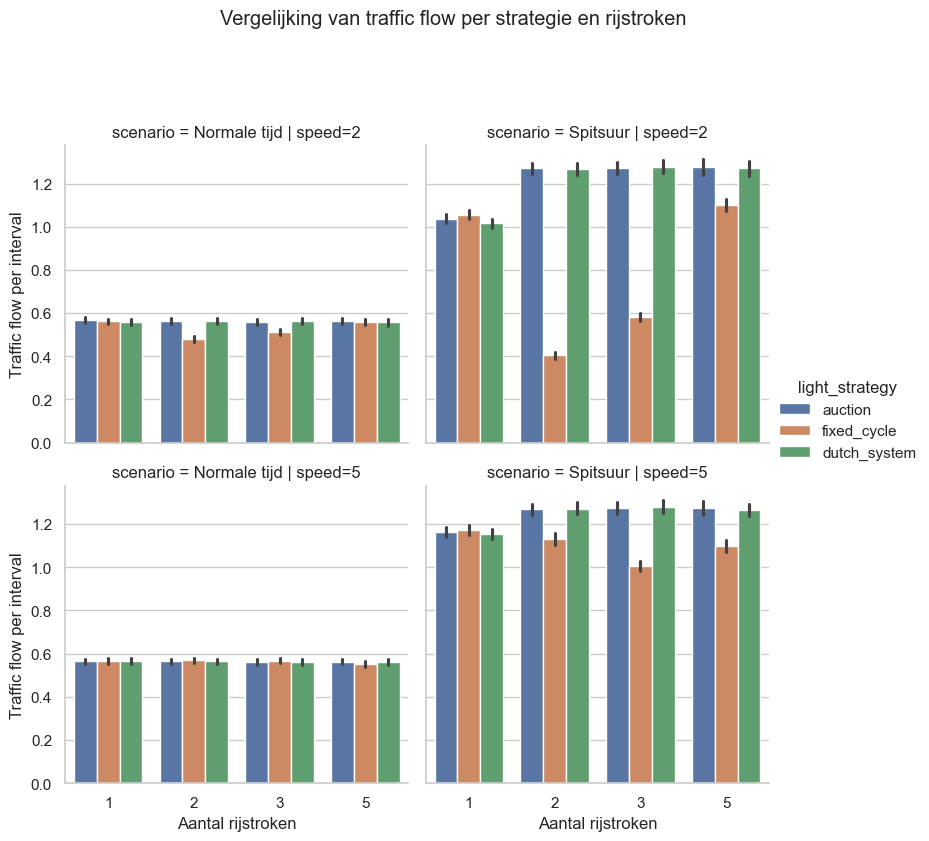

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Barplot per scenario
g = sns.catplot(
    data=df, x="num_lanes", y="TrafficFlowPerInterval", 
    hue="light_strategy", 
    col="scenario", kind="bar", 
    height=4, col_wrap=2, aspect=1
)

g.set_axis_labels("Aantal rijstroken", "Traffic flow per interval")
g.set_titles("scenario = {col_name}")
g.fig.subplots_adjust(top=0.88)
g.fig.suptitle("Vergelijking van traffic flow per strategie en rijstroken", y=1.05)

plt.show()


###  Conclusie

- In normale verkeersomstandigheden (linkerkant) is de traffic flow vrij stabiel en gelijkmatig tussen de strategieën, ongeacht het aantal rijstroken of de snelheid. Alle systemen lijken even goed te presteren.
  
- In spitsuur-situaties (rechterkant) ontstaan duidelijke verschillen:
  - De strategie `fixed_cycle` scoort significant lager in traffic flow, vooral bij weinig rijstroken.
  - Zowel `auction` als `dutch_system` behalen hogere en meer consistente traffic flow-waarden, wat wijst op betere aanpassing aan druk verkeer.
  
- Het verschil is vooral opvallend bij lage snelheden en weinig rijstroken, wat suggereert dat slimme systemen onder hoge druk meer waarde bieden.

**Conclusie**: Adaptieve strategieën zoals `auction` en `dutch_system` zorgen voor betere doorstroming, vooral onder drukke omstandigheden. Het klassieke `fixed_cycle` systeem schiet tekort wanneer flexibiliteit nodig is.